<a href="https://colab.research.google.com/github/Saifullah785/python-data-science-handbook-notes/blob/main/02_07_Fancy_Indexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fancy Indexing

Fancy indexing in NumPy is a method of accessing array elements using an array of indices. Unlike basic slicing, which works on contiguous blocks, fancy indexing allows you to select and arrange elements in arbitrary patterns.

# Exploring Fancy Indexing

This section demonstrates the fundamental concepts of fancy indexing with 1D and 2D arrays, showing how to select elements based on single index arrays and how the shape of the index array determines the shape of the output. It also introduces how broadcasting can be combined with fancy indexing.

In [39]:
import numpy as np

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=1701)

# Generate an array of 10 random integers between 0 and 99
x = rng.integers(100, size=10)

# Print the generated array
print(x)

[90 40  9 30 80 67 39 15 33 79]


In [40]:
# Access elements at specific indices using a Python list
[x[3], x[7], x[2]]

[np.int64(30), np.int64(15), np.int64(9)]

In [41]:
# Define an array of indices
ind = [3, 7, 4]

# Use fancy indexing to access elements at the specified indices
x[ind]

array([30, 15, 80])

In [42]:
# Define a 2D array of indices
ind = np.array([[3, 7],
                [4, 5]])

# Use fancy indexing to access elements at the specified indices, resulting in a 2D array
x[ind]

array([[30, 15],
       [80, 67]])

In [43]:
# Create a 2D array with values from 0 to 11 and reshape it to 3 rows and 4 columns
X = np.arange(12).reshape((3, 4))

# Print the 2D array
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
# Define arrays for row and column indices
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

# Use fancy indexing with separate row and column index arrays to select specific elements
X[row, col]

array([ 2,  5, 11])

In [45]:
# Use broadcasting with fancy indexing to select elements
# row[:, np.newaxis] creates a column vector from the row array
# This selects elements from each row at the specified column indices in 'col'
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [46]:
# Demonstrate broadcasting behavior with element-wise multiplication
# row[:, np.newaxis] is a column vector, col is a row vector
# The result is a 2D array where each element is the product of the corresponding row and column elements
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

# Combined Indexing

Combined indexing showcases how fancy indexing can be used in conjunction with other indexing methods like basic slicing and boolean masks to select specific subsets of array elements in more complex ways.

In [47]:
# Print the 2D array X
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [48]:
# Select elements from the third row (index 2) at specified column indices
X[2, [2, 0, 1]]

array([10,  8,  9])

In [49]:
# Select all rows (:) and specific columns using a list of indices
X[:, [2, 0, 1]]

array([[ 2,  0,  1],
       [ 6,  4,  5],
       [10,  8,  9]])

In [50]:
# Create a boolean mask for columns
mask = np.array([1, 0, 1, 0], dtype=bool)

# Use broadcasting with fancy indexing and a boolean mask
# row[:, np.newaxis] is a column vector for selecting rows
# mask selects columns where the value is True
# This selects elements from each row where the corresponding column in the mask is True
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points

This example illustrates a practical application of fancy indexing by demonstrating how to randomly select a subset of data points from a larger dataset. This is useful in various scenarios, such as bootstrapping or creating training/testing datasets.

In [51]:
# Define the mean and covariance matrix for generating multivariate normal data
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

# Generate 100 random points from a multivariate normal distribution
X = rng.multivariate_normal(mean, cov, 100)

# Print the shape of the generated array
X.shape

(100, 2)

In [52]:
# Print the generated multivariate normal data
X

array([[ 9.23761718e-01,  3.86247383e+00],
       [ 6.61751529e-01,  2.92566223e+00],
       [ 7.30981058e-01,  2.44134086e+00],
       [-3.29786797e-01, -1.16688738e-01],
       [-3.08887585e-01,  8.74389601e-01],
       [ 8.60135824e-01,  1.64977873e+00],
       [ 1.12535005e+00,  3.07970690e+00],
       [-1.15071385e+00, -1.02441057e+00],
       [ 8.52757448e-02, -9.07980378e-01],
       [ 7.24091502e-01,  2.16337705e+00],
       [-7.55750651e-01, -3.51313567e-01],
       [-1.13766512e+00, -2.80758238e+00],
       [ 1.51379786e-01, -1.23549790e+00],
       [-2.19302975e+00, -5.36976879e+00],
       [ 6.70249139e-01,  3.71399758e+00],
       [ 1.45648064e+00,  2.74167311e+00],
       [-8.50652055e-01, -1.54100459e+00],
       [ 2.05554772e-01,  7.80629399e-01],
       [-1.62415980e+00, -3.90121516e+00],
       [ 8.04554777e-01,  3.42702891e+00],
       [-8.31136835e-01, -1.42428390e+00],
       [-1.52519971e+00, -3.37676226e+00],
       [-3.75641948e-01, -1.31595855e+00],
       [ 7.

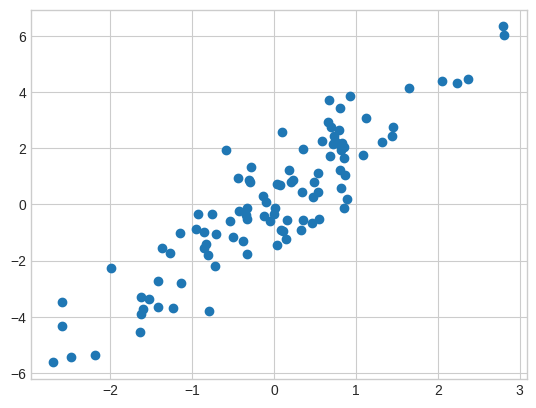

In [53]:
# Set the backend for matplotlib to display plots inline
%matplotlib inline

# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Use a specific style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Create a scatter plot of the generated data
# X[:, 0] are the x-coordinates, X[:, 1] are the y-coordinates
plt.scatter(X[:, 0], X[:, 1]);

In [54]:
# Randomly choose 20 indices from the range of the number of rows in X without replacement
indices = np.random.choice(X.shape[0], 20, replace=False)

# Print the selected indices
indices

array([43,  9, 90, 39, 25, 10, 54, 31, 11, 14, 46, 34, 56, 13, 75, 30, 48,
       85, 70,  8])

In [55]:
# Select the rows from X at the randomly chosen indices using fancy indexing
selection = X[indices]

# Print the shape of the selected subset
selection.shape

(20, 2)

In [56]:
# Print the selected subset of points
selection

array([[-8.09056584e-01, -1.81703893e+00],
       [ 7.24091502e-01,  2.16337705e+00],
       [ 8.03032647e-01,  1.20986161e+00],
       [-8.55749544e-01, -9.99618236e-01],
       [-3.41910865e-01, -3.74276386e-01],
       [-7.55750651e-01, -3.51313567e-01],
       [ 7.94899718e-01,  2.13159391e+00],
       [-5.91795754e-01,  1.91761015e+00],
       [-1.13766512e+00, -2.80758238e+00],
       [ 6.70249139e-01,  3.71399758e+00],
       [-3.27562105e-01, -1.77482480e+00],
       [-9.50621459e-01, -8.69559492e-01],
       [ 2.79594472e+00,  6.33408633e+00],
       [-2.19302975e+00, -5.36976879e+00],
       [ 3.27979510e-01, -9.04223047e-01],
       [-1.42326788e+00, -2.72306289e+00],
       [ 1.43891059e+00,  2.42258911e+00],
       [-2.57288282e-03, -3.39005109e-01],
       [-7.19572387e-01, -2.20706627e+00],
       [ 8.52757448e-02, -9.07980378e-01]])

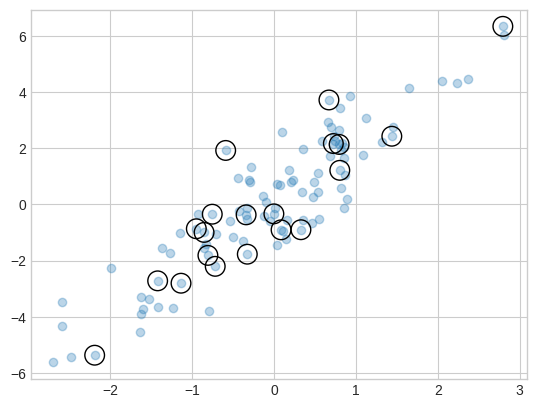

In [57]:
# Create a scatter plot of all points with some transparency
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

# Create a scatter plot of the selected points with black edges and no face color, and a larger size
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none',edgecolors='black', s=200);

# Modifying Values with Fancy Indexing

Fancy indexing can also be used to modify array elements at specific indices. This section shows how to assign values to selected elements and highlights the behavior when indices are repeated, introducing `np.add.at` for correctly handling repeated index modifications.

In [58]:
# Create a numpy array of integers from 0 to 9
x = np.arange(10)

# Define an array of indices
i = np.array([2, 1, 8, 4])

# Use fancy indexing to assign the value 99 to the elements at the specified indices
x[i] = 99

# Print the modified array
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [59]:
# Use fancy indexing to subtract 10 from the elements at the specified indices
x[i] -= 10

# Print the modified array
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [60]:
# Create an array of zeros of size 10
x = np.zeros(10)

# Use fancy indexing to assign values to elements at specified indices.
# Note: If indices are repeated, the last assignment for that index wins.
x[[0, 0]] = [4, 6]

# Print the modified array
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
# Define an array of indices with repeated values
i = [2, 3, 3, 4, 4, 4]

# Use fancy indexing to add 1 to the elements at the specified indices.
# Note: This will only add 1 once for each unique index, even if the index is repeated in 'i'.
x[i] += 1

# Print the modified array
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [62]:
# Create an array of zeros of size 10
x = np.zeros(10)

# Use np.add.at to add 1 to elements at specified indices.
# This function correctly handles repeated indices by adding the value for each occurrence of the index.
np.add.at(x, i, 1)

# Print the modified array
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# Example: Binning Data

This example demonstrates how fancy indexing, particularly with `np.add.at`, can be used to efficiently perform data binning, which is a common technique for creating histograms or categorizing data into intervals. It also compares the performance of this custom binning method with NumPy's built-in histogram function.

In [63]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=1701)

# Generate an array of 100 random numbers from a normal distribution
x = rng.normal(size=100)

# compute a histogram by hand

# Define the edges of the bins for the histogram
bins = np.linspace(-5, 5, 20)

# Initialize an array of zeros to store the counts in each bin
counts = np.zeros_like(bins)

# find the appropriate bin for each x
# np.searchsorted finds the indices where elements should be inserted to maintain order
# This effectively finds which bin each element of x falls into
i = np.searchsorted(bins, x)

# add 1 to each of these bins
# Use np.add.at to increment the count for each corresponding bin index
np.add.at(counts, i, 1)

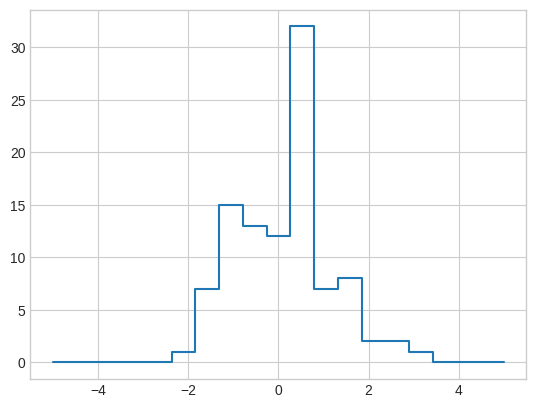

In [64]:
# plot the results

# Plot the histogram using the calculated counts and bin edges
# drawstyle='steps' creates a step-like plot, typical for histograms
plt.plot(bins, counts, drawstyle='steps')

In [65]:
# Print a message indicating the type of histogram and the number of points
print(f"Numpy histogram ({len(x)} points):")

# Measure the execution time of numpy's built-in histogram function
%timeit counts, edges = np.histogram(x, bins)

# Print a message indicating the custom histogram and the number of points
print(f"Custom histogram ({len(x)} points):")

# Measure the execution time of the custom histogram calculation using np.add.at
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy histogram (100 points):
18 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom histogram (100 points):
10.8 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [66]:
# Generate a larger array of random numbers from a normal distribution
x = rng.normal(size=1000000)

# Print a message indicating the type of histogram and the number of points
print(f"Numpy histogram ({len(x)} points):")

# Measure the execution time of numpy's built-in histogram function for a larger dataset
%timeit counts, edges = np.histogram(x, bins)

# Print a message indicating the custom histogram and the number of points
print(f"Custom histogram ({len(x)} points):")

# Measure the execution time of the custom histogram calculation using np.add.at for a larger dataset
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy histogram (1000000 points):
12.3 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom histogram (1000000 points):
90.2 ms ± 6.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
